<a href="https://colab.research.google.com/github/Namanm23/Deep-Learning-Codes/blob/main/Exp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0, Loss: 4.8024
Epoch 100, Loss: 0.3788
Epoch 200, Loss: -0.0420
Epoch 300, Loss: -0.3263
Epoch 400, Loss: -0.4827
Epoch 500, Loss: -0.5912
Epoch 600, Loss: -0.6791
Epoch 700, Loss: -0.7547
Epoch 800, Loss: -0.8181
Epoch 900, Loss: -0.8745


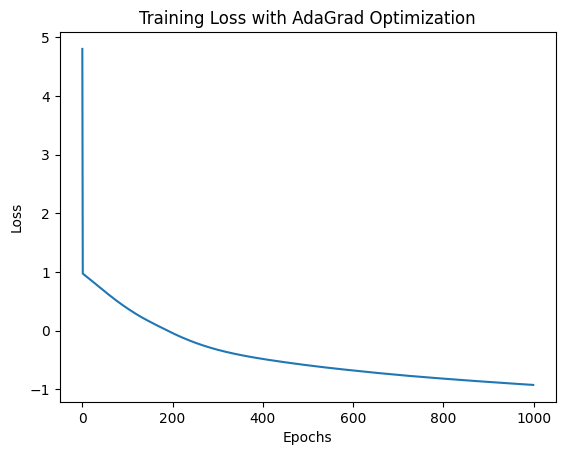

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class AdaGradOptimizer:
    def __init__(self, learning_rate=0.01, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.grad_squares = {}

    def update(self, param, grad):
        if param not in self.grad_squares:
            self.grad_squares[param] = np.zeros_like(grad)
        self.grad_squares[param] += grad ** 2
        adjusted_grad = grad / (np.sqrt(self.grad_squares[param]) + self.epsilon)
        return self.learning_rate * adjusted_grad

class DNN:
    def __init__(self, layer_sizes):
        self.params = {}
        self.layer_sizes = layer_sizes
        self.initialize_params()

    def initialize_params(self):
        for i in range(1, len(self.layer_sizes)):
            self.params[f'W{i}'] = np.random.randn(self.layer_sizes[i], self.layer_sizes[i-1]) * 0.01
            self.params[f'b{i}'] = np.zeros((self.layer_sizes[i], 1))

    def forward(self, X):
        cache = {'A0': X}
        A = X
        for i in range(1, len(self.layer_sizes)):
            W = self.params[f'W{i}']
            b = self.params[f'b{i}']
            Z = np.dot(W, A) + b
            A = np.maximum(0, Z)  # ReLU activation
            cache[f'Z{i}'] = Z
            cache[f'A{i}'] = A
        return A, cache

    def compute_loss(self, A, Y):
        m = Y.shape[1]
        loss = -np.sum(Y * np.log(A + 1e-8)) / m
        return loss

    def backward(self, cache, Y):
        grads = {}
        m = Y.shape[1]
        A_final = cache[f'A{len(self.layer_sizes)-1}']
        dA = - (np.divide(Y, A_final + 1e-8) - np.divide(1 - Y, 1 - A_final + 1e-8))
        for i in reversed(range(1, len(self.layer_sizes))):
            dZ = dA * (cache[f'Z{i}'] > 0)
            dW = np.dot(dZ, cache[f'A{i-1}'].T) / m
            db = np.sum(dZ, axis=1, keepdims=True) / m
            dA = np.dot(self.params[f'W{i}'].T, dZ)
            grads[f'dW{i}'] = dW
            grads[f'db{i}'] = db
        return grads

    def update_params(self, grads, optimizer):
        for i in range(1, len(self.layer_sizes)):
            self.params[f'W{i}'] -= optimizer.update(f'W{i}', grads[f'dW{i}'])
            self.params[f'b{i}'] -= optimizer.update(f'b{i}', grads[f'db{i}'])

    def train(self, X, Y, epochs=1000, learning_rate=0.01):
        optimizer = AdaGradOptimizer(learning_rate=learning_rate)
        losses = []
        for epoch in range(epochs):
            A, cache = self.forward(X)
            loss = self.compute_loss(A, Y)
            grads = self.backward(cache, Y)
            self.update_params(grads, optimizer)
            losses.append(loss)
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss:.4f}')
        return losses

# Generate synthetic dataset
np.random.seed(42)
X = np.random.randn(2, 500)
Y = (np.sum(X, axis=0, keepdims=True) > 0).astype(float)

# Initialize and train the neural network
dnn = DNN([2, 4, 1])
losses = dnn.train(X, Y, epochs=1000, learning_rate=0.1)

# Plot the training loss
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss with AdaGrad Optimization')
plt.show()
